# _Foundations of Applied Mathematics_ Labs: Volume 1

In [1]:
%matplotlib inline

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi, cos, sin

In [25]:
# May or may not be needed for Chapter 3
import scipy as sp
from scipy import stats         # Import stats explicitly. Access it
from scipy import linalg as la
from scipy import sparse

from scipy.sparse import linalg as spla

# 4. Least Squares and Computing Eigenvalues

In [30]:
import numpy as np
from scipy.stats import linregress

# Generate some random data close to the line y = .5x - 3.
x = np.linspace(0, 10, 20)
y = .5*x - 3 + np.random.randn(20)

# Use linregress() to calculate m and b, as well as the correlation
# coefficient, p-value, and standard error. See the documentation for
# details on each of these extra return values.
a, b, rvalue, pvalue, stderr = linregress(x, y)

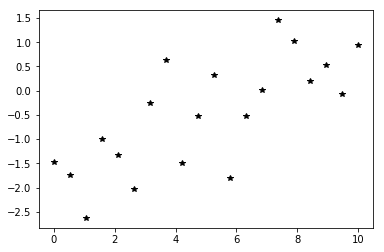

In [31]:
plt.plot(x, y, 'k*', label="Data Points")

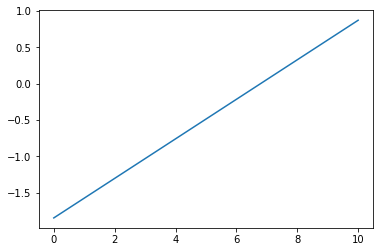

In [34]:
plt.plot(x, a*x + b, label="Least Squares Fit")

No handles with labels found to put in legend.


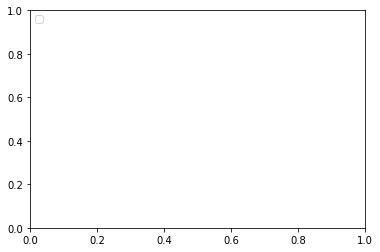

In [35]:
plt.legend(loc="upper left")

In [36]:
plt.show()

In [37]:
print(np.vander([2, 3, 5], 2))

[[2 1]
 [3 1]
 [5 1]]


In [38]:
print(np.vander([2, 3, 5, 4], 3))

[[ 4  2  1]
 [ 9  3  1]
 [25  5  1]
 [16  4  1]]


In [39]:
# Create a callable object for the polynomial f(x) = (x-1)(x-2) = x^2 - 3x + 2.
f = np.poly1d([1, -3, 2])
print(f)

   2
1 x - 3 x + 2


In [40]:
# Evaluate f(x) for several values of x in a single function call.
f([1, 2, 3, 4])

array([0, 0, 2, 6])

In [41]:
from scipy import linalg as la

# Define A and b appropriately.

# Solve the normal equations using SciPy's least squares routine.
# The least squares solution is the first of four return values.
x = la.lstsq(A, b)[0]

# Generate some random data close to the line y = x^2 - 3x + 2.
x = np.linspace(0, 10, 20)
y = x**2 - 3*x + 2 + np.random.randn(20)

# Use np.polyfit() to calculate the best fit 2nd degree polynomial.
coeffs = np.polyfit(x, y, 2)

domain = np.linspace(0, 10, 200)
plt.plot(x, y, 'k*')

IndexError: tuple index out of range

In [ ]:
plt.plot(domain, np.polyval(coeffs, domain))
plt.show()

# Load some data and construct the matrix A and the vector b.
xk, yk = np.load("circle.npy").T
A = np.column_stack((2*xk, 2*yk, np.ones_like(xk)))
b = xk**2 + yk**2

# Calculate the least squares solution and solve for the radius.
c1, c2, c3 = la.lstsq(A, b)[0]
r = np.sqrt(c1**2 + c2**2 + c3)

# Plot the circle using polar coordinates.
theta = np.linspace(0, 2*np.pi, 200)
x = r*np.cos(theta) + c1
y = r*np.sin(theta) + c2
plt.plot(x, y)                  # Plot the circle.
plt.plot(xk, yk, 'k*')          # Plot the data points.
plt.axis("equal")

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

# Construct a random matrix with positive entries.
A = np.random.random((10,10))

# Compute the eigenvalues and eigenvectors of A via SciPy.
eigs, vecs = la.eig(A)

# Get the dominant eigenvalue and eigenvector of A.
# The eigenvector of the kth eigenvalue is the kth column of 'vecs'.
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]

# Verify that Ax = lambda x.
np.allclose(A @ x, lamb * x)

C = np.vstack(w) * A
z = w * b
x = la.lstsq(C, z)[0]